In [1]:
%matplotlib inline
import ast
import os
import sys
import numpy as np
import pandas as pd
#import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import pylab as plt

mpl.rcParams['font.family'] = 'Arial'

#import seaborn as sns
#from itertools import groupby
#from scipy import integrate
#from tqdm import tqdm
#import rasterio

In [2]:
# change paths to make it work on your own machine
data_path = os.path.join('C:\\','data','pg_risk_analysis')
tc_path = os.path.join(data_path,'tc_netcdf')
fl_path = os.path.join(data_path,'GLOFRIS')
osm_data_path = os.path.join('C:\\','data','country_osm')
pg_data_path = os.path.join(data_path,'pg_data')
vul_curve_path = os.path.join(data_path,'vulnerability_curves')

0       0
1      30
2      61
3      91
4     122
5     152
6     183
7     213
8     244
9     274
10    305
Name: Depth (cm)\factor, dtype: int64


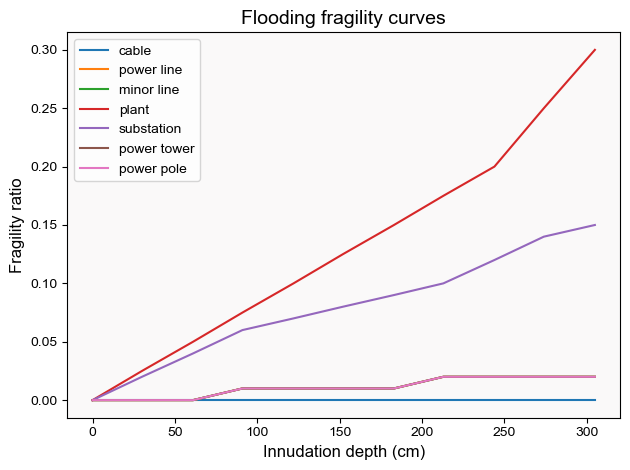

In [19]:
# flooding fragility curves figure

#fl_curves = pd.read_excel(os.path.join(vul_curve_path,'power_infra_vulnerability_data.xlsx'),sheet_name='flooding',index_col=[0])
#print(fl_curves)
#fig,ax = plt.subplots(1,1,figsize = (8,5))

#color_scheme = ['#13293D','#006494','#247BA0','#1B98E0'] #['#bae4bc','#7bccc4','#43a2ca','#0868ac']
#cmap = LinearSegmentedColormap.from_list(name='continents',colors=color_scheme)  

#fl_curves.plot(ax=ax,linewidth=3,color='black',legend=False)
fig, ax = plt.subplots()

fl_curves = pd.read_excel(os.path.join(vul_curve_path,'power_infra_vulnerability_data.xlsx'),sheet_name='flooding')#,index_col=[0]

x = fl_curves.iloc[:,0]
print(x)

cable = fl_curves.iloc[:,1]
power_line = fl_curves.iloc[:,2]
minor_line = fl_curves.iloc[:,3]
plant = fl_curves.iloc[:,4]
substation = fl_curves.iloc[:,5]
power_tower = fl_curves.iloc[:,6]
power_pole = fl_curves.iloc[:,7]
#print(power_tower)

#plt.plot(x,cable,power_line,minor_line,plant,substation,power_tower,power_pole)
#ax.plot(x,cable,power_line,minor_line,plant,substation,power_tower,power_pole)

ax.plot(x, cable, label='cable')
ax.plot(x, power_line, label='power line')
ax.plot(x, minor_line, label='minor line')
ax.plot(x, plant, label='plant')
ax.plot(x, substation, label='substation')
ax.plot(x, power_tower, label='power tower')
ax.plot(x, power_pole, label='power pole')

ax.set_facecolor('#FAF9F9')
ax.set_xlabel('Innudation depth (cm)',fontsize=12) #,fontweight='bold'
ax.set_ylabel('Fragility ratio',fontsize=12) #,fontweight='bold'
ax.tick_params(axis = 'both',labelsize=10,labelcolor='black',color='black')

ax.set_title('Flooding fragility curves',fontsize=14)
ax.legend()

#plt.show()
"""
ax.text(1425, 0.98, 'cable',fontweight="bold",color='green', fontsize=18)
ax.text(1425, 0.9, 'power line',fontweight="bold",color='red', fontsize=18)
ax.text(1425, 0.82, 'minor line',fontweight="bold",color='blue', fontsize=18)
ax.text(1425, 0.48, 'plant',fontweight="bold",color='black', fontsize=18)
ax.text(1425, 0.48, 'substation',fontweight="bold",color='black', fontsize=18)
ax.text(1425, 0.48, 'power tower',fontweight="bold",color='black', fontsize=18)
ax.text(1425, 0.48, 'power pole',fontweight="bold",color='black', fontsize=18)
"""
fig.tight_layout()
fig.savefig(os.path.join(data_path,'Figures','flooding_fragility_curves.png'),dpi=300)